# Antes de empezar:
Lee el archivo README.md <p>
Comenta todo lo que puedas y utiliza los recursos del archivo README.md
¡Feliz aprendizaje!

In [398]:
# Import your libraries:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Reto 1 - Explorar los conjuntos de datos de Scikit-Learn

Antes de empezar a trabajar con nuestros propios conjuntos de datos, exploremos primero los conjuntos de datos incluidos en esta biblioteca de Python. Estos conjuntos de datos se han limpiado y formateado para su uso en algoritmos de ML.

En primer lugar, cargaremos el conjunto de datos de la diabetes. Hazlo en la celda de abajo importando los conjuntos de datos y luego cargando el conjunto de datos en la `diabetes` utilizando la función `load_diabetes()`.

In [402]:
db = load_diabetes()

#Check the data format.
X, y = db.data, db.target

print (X.shape)
print (y.shape)

features = db.feature_names  # Feature names
features

(442, 10)
(442,)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Vamos a explorar esta variable observando los diferentes atributos. Para ello, mira las `keys()` de esta variable.

In [405]:
db.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

El siguiente paso es leer la descripción del conjunto de datos. Imprima la descripción en la celda siguiente utilizando el atributo `DESCR` de la variable `diabetes`

In [408]:
print(db.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

¿Cuáles son las variables de este conjunto de datos según la descripción? Enuméralas en la celda markdown siguiente

#### Introduzca aquí su respuesta:

    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sur levels6

Ahora explora los datos. Scikit-learn normalmente toma arrays numpy 2D como entrada (aunque también se aceptan dataframes pandas). En la celda de abajo encuentra la forma del array numpy contenido en la parte de datos de la variable diabetes.

In [413]:
print (X.shape)
print (y.shape)

(442, 10)
(442,)


# Reto 2 - Realizar aprendizaje supervisado en el conjunto de datos

#### Los datos ya se han dividido en variables predictoras y de respuesta. La variable de respuesta se encuentra en la parte «objetivo» de la variable. 

Dada esta información, vamos a aplicar lo que hemos aprendido previamente sobre regresión lineal y aplicar el algoritmo al conjunto de datos de la diabetes. En la celda de abajo, importa la clase de regresión lineal de sklearn. 

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (397, 10) (45, 10)
Train and test sizes of y: (397,) (45,)


Inicializar el modelo en la variable `diabetes_model`.

In [420]:
diabetes_model = LinearRegression() # Create the Linear Regression estimator

En la celda de abajo, ajusta el modelo e imprime el intercepto y los coeficientes del modelo.

age     28.145261
s6      67.852086
s3     148.622302
sex    214.110095
s4     227.601504
bp     336.701559
s2     483.281408
bmi    497.209209
s5     762.276764
s1     833.483234
dtype: float64


<Axes: title={'center': 'Model Coefficients'}>

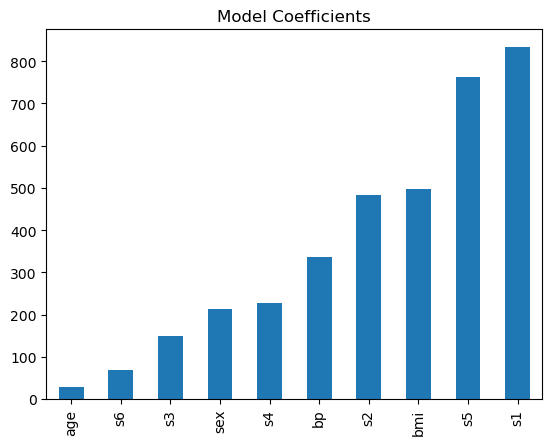

In [423]:
diabetes_model.fit(X_train, y_train) # Perform the fitting

# Regrerssion coefs
coefs_diabetes_model = pd.Series(np.abs(diabetes_model.coef_), features).sort_values()
print(coefs_diabetes_model)
coefs_diabetes_model.plot(kind='bar', title='Model Coefficients')

# Reto bonus 1 - Realizar una prueba de hipótesis sobre el modelo

Una vez que hemos generado un modelo lineal, podemos probar cada coeficiente utilizando una prueba t para ver si el intervalo de confianza de la variable contiene cero. También podemos realizar una prueba F global para comprobar si al menos un coeficiente es significativamente distinto de cero. 

Consulte el recurso en este [enlace](https://onlinecourses.science.psu.edu/stat501/node/297/) para obtener más detalles y realice las pruebas t para el modelo anterior. Además, interprete los resultados y enumere los coeficientes que son significativamente diferentes de cero.


Sugerencia: utilice el paquete statsmodels.

Su resultado debería ser similar al siguiente

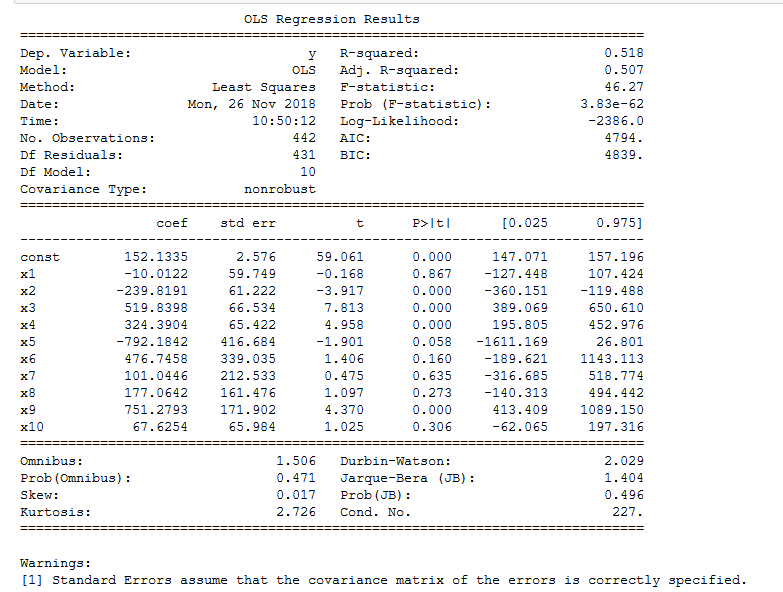

In [426]:
############################
##########OLS###############
############################
import statsmodels.api as sm

# Convert to a df
X_df = pd.DataFrame(X, columns=db.feature_names)

# Add a constant 
X_df = sm.add_constant(X_df)

# Fit the OLS 
model = sm.OLS(y, X_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.83e-62
Time:                        21:28:55   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

# Reto 3 - Realizar aprendizaje supervisado en un marco de datos Pandas

Ahora que hemos visto los datos que han sido formateados para scikit-learn, vamos a ver los datos que tendremos que formatear nosotros mismos.

En la siguiente celda, cargue el archivo `auto-mpg.csv` incluido en esta carpeta y asígnalo a una variable llamada `auto`.

In [430]:
import pandas as pd
auto = pd.read_csv(r'C:\Users\ievav\OneDrive\Documents\Ironhack\Assignments\lab-intro-to-sklearn-es/auto-mpg.csv')

Mira las 5 primeras filas usando la función `head()`:

In [433]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evalúa los datos para asegurar que todas las columnas numéricas son detectadas correctamente como tales por pandas. Si una columna se clasifica erróneamente como objeto, cámbiala a numérica.

In [436]:
print(auto.dtypes)
#auto['car_name'] = pd.to_numeric(auto['car_name'], errors='coerce')
#print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object


¿Cuál es el año del modelo más reciente y el año del modelo más antiguo?

In [439]:
newest_year = auto['model_year'].max()
oldest_year = auto['model_year'].min()
print(newest_year, oldest_year)

82 70


Comprueba si faltan valores en el conjunto de datos y elimina todas las filas que contengan al menos un valor omitido.

In [442]:
nan_counts = {}

# Iterate over each column in the DataFrame
for column in auto:
    nan_count = auto[column].isna().sum()  # Count NaNs in the current column
    nan_counts[column] = nan_count  # Store the count in the dictionary

print(nan_counts)

{'mpg': 0, 'cylinders': 0, 'displacement': 0, 'horse_power': 6, 'weight': 0, 'acceleration': 0, 'model_year': 0, 'car_name': 0}


In [444]:
auto.dropna(axis=0, how="any", inplace=False)


print(auto.isna().sum())  # Check for remaining NaN values
auto

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64


,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,"\t""ford mustang gl"""
394,44.0,4,97.0,52.0,2130,24.6,82,"\t""vw pickup"""
395,32.0,4,135.0,84.0,2295,11.6,82,"\t""dodge rampage"""
396,28.0,4,120.0,79.0,2625,18.6,82,"\t""ford ranger"""


Encuentra la tabla de frecuencias para la columna `cylinders` utilizando la función `value_counts()`. ¿Cuántos valores posibles de cilindros hay?

In [447]:
cylinder_counts = auto['cylinders'].value_counts()
print(cylinder_counts)

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


Queremos generar un modelo de regresión lineal que prediga el mpg. Para ello, en primer lugar, elimina la columna «car_name», ya que no contiene ningún dato cuantitativo. A continuación, separa el marco de datos en variables predictoras y de respuesta. Sepáralos en datos de train y de test, con el 80% de los datos en el conjunto de entrenamiento y el resto en el conjunto de prueba. 

Asigna los datos de entrenamiento del predictor y de la respuesta a `X_train` y `y_train` respectivamente. Del mismo modo, asigna los datos de prueba del predictor y de la respuesta a `X_test` y `y_test`.

In [450]:
print(auto.columns)
print(auto.info())
print(auto.shape)  # Check the shape of the DataFrame
auto

Index(['mpg', 'cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'model_year', 'car_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB
None
(398, 8)


,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,"\t""ford mustang gl"""
394,44.0,4,97.0,52.0,2130,24.6,82,"\t""vw pickup"""
395,32.0,4,135.0,84.0,2295,11.6,82,"\t""dodge rampage"""
396,28.0,4,120.0,79.0,2625,18.6,82,"\t""ford ranger"""


In [452]:
# Drop the car_name column
auto = auto.drop(columns=['car_name'])

In [454]:
# Check remaining columns
X = auto.drop(columns=['mpg']) 

y = auto['mpg']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (398, 6)
y shape: (398,)


In [456]:
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index]  # Align y with the cleaned X

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2)


print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (313, 6) (79, 6)
Train and test sizes of y: (313,) (79,)


Ahora vamos a procesar el conjunto de datos y realizar una regresión lineal sobre estos datos para predecir el mpg para cada vehículo. Inicializa el modelo en la celda de abajo.

In [461]:
auto_model = LinearRegression() # Create the Linear Regression estimator

A continuación, ajusta el modelo en la celda inferior.

2    0.005088
3    0.006692
1    0.007905
4    0.091242
0    0.437609
5    0.779324
dtype: float64


<Axes: title={'center': 'Model Coefficients'}>

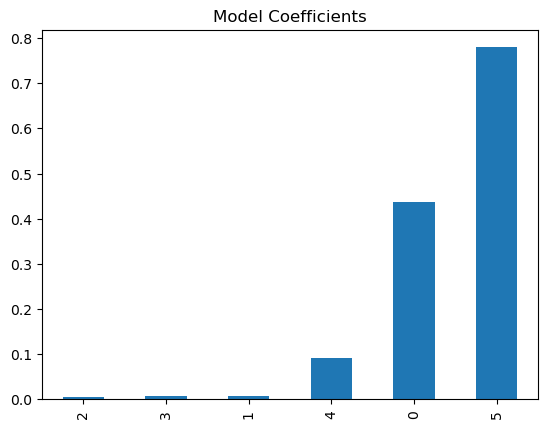

In [464]:
auto_model.fit(X_train, y_train) # Perform the fitting

# Regrerssion coefs
coefs_auto_model = pd.Series(np.abs(auto_model.coef_)).sort_values()
print(coefs_auto_model)
coefs_auto_model.plot(kind='bar', title='Model Coefficients')

# Reto 4 - Evaluar el modelo

La puntuación r al cuadrado de un modelo nos indica cuánta variación explica el modelo. En un conjunto de datos típico, la mayoría de las observaciones difieren de la media. Cuando creamos un modelo, intentamos generar una ecuación que nos diga en qué medida cada observación difiere de la media. Obviamente, la gran mayoría de los modelos no son perfectos. Sólo pueden predecir una parte de la variación con respecto a la media, pero no toda. Atribuimos el resto de la diferencia entre el valor real y la media al error aleatorio. Nos gustaría que el error aleatorio explicara la menor parte posible de la variación. Por eso la puntuación r al cuadrado es una métrica importante.

En la siguiente celda, calcula la puntuación r al cuadrado del modelo. Para ello, primero calcula los valores predichos y asígnalos a `y_pred`.

In [467]:
y_pred = auto_model.predict(X_train)
print(auto_model.score(X_train, y_train))

0.8282439524318993


#### Nuestro siguiente paso es evaluar el modelo utilizando los datos de prueba. Queremos asegurarnos de que nuestro modelo no se ajusta en exceso a los datos. Esto significa que nuestro modelo no será capaz de generalizar bien fuera de los datos de entrenamiento.

En la celda siguiente, utiliza el modelo para generar los valores predichos para los datos de entrenamiento y asígnalos a `y_test_pred`. Calcula la puntuación r al cuadrado para los datos de prueba comparando los datos observados de `y_train` y los predichos de `y_test_pred`.

In [470]:
# Now make predictions
y_test_pred = auto_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_test_pred)
r2score_test = auto_model.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(auto_model.intercept_, auto_model.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score train: {}'.format(r2score_train))
print('R^2 Score test: {}'.format(r2score_test))



Intercept and coefs:
-16.897261414831007 [-0.43760929  0.00790519  0.00508768 -0.00669218  0.09124151  0.77932401]

MSE: 16.982377092851312
R^2 Score train: 0.8070018396230418
R^2 Score test: 0.729998774562715


# Reto 5 - Mejorar el ajuste del modelo

Aunque la forma más común de mejorar el ajuste de un modelo es utilizando la regularización, hay otras formas más sencillas de mejorar el ajuste del modelo. La primera es crear un modelo más simple. La segunda es aumentar el tamaño de la muestra de entrenamiento.

Empecemos con la opción más sencilla y aumentemos el tamaño de la muestra de entrenamiento al 90% de los datos. Cre una nueva división train-test y denomina a los nuevos predictores y variables de respuesta `X_entrenamiento09`, `X_prueba09`, `y_entrenamiento09`, `y_prueba09`.

In [473]:
X_train_09, X_test_09, y_train_09, y_test_09 = train_test_split(X_cleaned, y_cleaned, test_size=0.2)

print('Train and test sizes of X: {} {}'.format(X_train_09.shape, X_test_09.shape))
print('Train and test sizes of y: {} {}'.format(y_train_09.shape, y_test_09.shape))


Train and test sizes of X: (313, 6) (79, 6)
Train and test sizes of y: (313,) (79,)


Inicializa un nuevo modelo. Nombre este modelo `auto_model09`. Ajusta el modelo a los nuevos datos de muestra.

In [476]:
auto_model_09 = LinearRegression() # Create the Linear Regression estimator

Calcula los valores predichos y la puntuación r al cuadrado para nuestro nuevo modelo y los nuevos datos de muestra.

2    0.000117
1    0.000501
3    0.006104
4    0.021352
0    0.342789
5    0.724448
dtype: float64

Intercept and coefs:
-11.172761279160671 [-3.42788663e-01 -5.01288828e-04 -1.17460354e-04 -6.10410207e-03
 -2.13515309e-02  7.24448413e-01]

MSE: 11.336056161847285
R^2 Score train: 0.8071560836738676


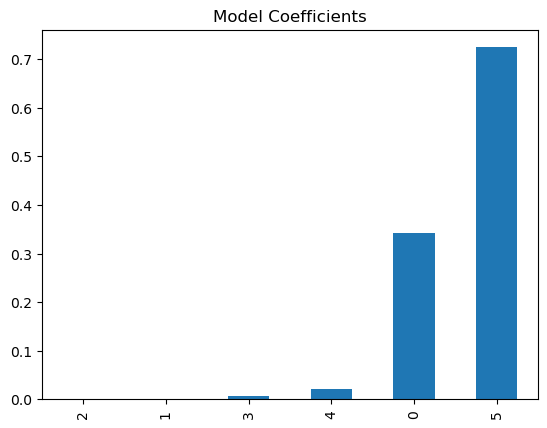

In [479]:
# Your code here:
auto_model_09.fit(X_train_09, y_train_09) # Perform the fitting

# Regrerssion coefs
coefs_auto_model_09 = pd.Series(np.abs(auto_model_09.coef_)).sort_values()
print(coefs_auto_model_09)
coefs_auto_model_09.plot(kind='bar', title='Model Coefficients')


# Now make predictions
y_test_pred_09 = auto_model_09.predict(X_test_09)

# Evaluate model
mse_09 = mean_squared_error(y_test_09, y_test_pred_09)  # The mean squared error
r2score_train_09 = auto_model_09.score(X_train_09, y_train_09)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(auto_model_09.intercept_, auto_model_09.coef_))
print('\nMSE: {}'.format(mse_09))
print('R^2 Score train: {}'.format(r2score_train_09))

Calcula la puntuación r al cuadrado para el conjunto de prueba más pequeño. ¿Existe una mejora en la r al cuadrado de la prueba?

In [482]:
r2score_test_09 = auto_model_09.score(X_test_09, y_test_09)

# The coefficient of determination: 1 is perfect prediction
print('R^2 90%Score test: {}'.format(r2score_test_09))
print('R^2 10% Score train: {}'.format(r2score_train_09))

print('R^2 80% Score train: {}'.format(r2score_train))
print('R^2 20% Score test: {}'.format(r2score_test))

R^2 90%Score test: 0.808960861551299
R^2 10% Score train: 0.8071560836738676
R^2 80% Score train: 0.8070018396230418
R^2 20% Score test: 0.729998774562715


# Reto bonus 2 - Backward Elimination 


La principal forma de producir un modelo de regresión lineal más simple es reducir el número de variables utilizadas en el modelo. En scikit-learn, podemos hacer esto mediante el uso de la eliminación recursiva de características. Puedes leer más sobre RFE [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

En la siguiente celda, vamos a importar RFE

In [485]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Sigue la documentación e inicializa un modelo RFE utilizando el modelo de regresión lineal `auto_model`. Establece `n_features_to_select=3`.

In [488]:
# Create a pipeline with scaling and RFE
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),  # Scale features to a range
        ("rfe", RFE(estimator=LinearRegression(), n_features_to_select=3, step=1)),  # RFE
        ("model", LinearRegression())  # The model for predictions
    ]
)

Ajusta el modelo e imprime la clasificación

In [491]:
# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions
y_test_pred = pipe.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_test_pred)
r2score_test = pipe.score(X_test, y_test)

# Retrieve the ranking of features from RFE
ranking = pipe.named_steps["rfe"].ranking_

# Output the evaluation results
print('\nMean Squared Error (MSE): {}'.format(mse))
print('R^2 Score test: {}'.format(r2score_test))
print('Feature Ranking: {}'.format(ranking))

# Get the selected feature names
selected_features = X.columns[pipe.named_steps["rfe"].support_]
print('Selected Features:', selected_features)

# Create a new DataFrame with the selected features
auto_reduced = X[selected_features].copy()  # or X.loc[:, selected_features] for better indexing
auto_reduced = pd.concat([auto_reduced, y], axis=1)  # This adds the target variable to the dataset

# Output the new reduced dataset
print('\nReduced Dataset (auto_reduced):')
print(auto_reduced.head())


Mean Squared Error (MSE): 16.94793164590813
R^2 Score test: 0.7305464195027929
Feature Ranking: [2 1 4 1 3 1]
Selected Features: Index(['displacement', 'weight', 'model_year'], dtype='object')

Reduced Dataset (auto_reduced):
   displacement  weight  model_year   mpg
0         307.0    3504          70  18.0
1         350.0    3693          70  15.0
2         318.0    3436          70  18.0
3         304.0    3433          70  16.0
4         302.0    3449          70  17.0


La importancia de las características se clasifica de la más importante (1) a la menos importante (4). Genera un modelo con las tres características más importantes. Las características corresponden a los nombres de las variables. Por ejemplo, la característica 1 es «cilindros» y la característica 2 es «desplazamiento».

Realiza una división train-test en esta columna de datos reducida y llama a los datos divididos `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Utiliza una división del 80%.

In [494]:

# Assuming auto_reduced is your DataFrame
# Drop missing values from the features
X = auto_reduced.drop(columns=['mpg']).dropna()

# Align y with the cleaned X
y = auto_reduced['mpg'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Genera un nuevo modelo llamado `auto_model_reduced` y ajusta este modelo. A continuación, calcula la puntuación r al cuadrado del modelo. ¿Ha mejorado la puntuación r al cuadrado?

In [497]:

# Create a new model for the reduced dataset
auto_model_reduced = LinearRegression()

# Fit the new model on the reduced training data
auto_model_reduced.fit(X_train, y_train)

# Make predictions using the reduced model
y_test_pred_reduced = auto_model_reduced.predict(X_test)

# Calculate R^2 score for the reduced model
r2score_test_reduced = r2_score(y_test, y_test_pred_reduced)

# Output the evaluation results
print('R^2 Score for reduced model: {}'.format(r2score_test_reduced)) # No ha mejorado!

R^2 Score for reduced model: 0.8244724172669363
